### Business Problem

#### Client wants us to analyze diwali sales data in order to understand the trend, insights,top performing products,categories,zones,so that they can prepare better to improve sales

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r"C:\Users\anipi\Desktop\Summer Internship\Diwali Sales Data (2).csv" , encoding = 'unicode_escape')

In [5]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952,NaN,NaN
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934,NaN,NaN
2,1001990.0,Bindu,P00118542,F,26-35,35,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924,NaN,NaN
3,1001425.0,Sudevi,P00237842,M,0-17,16,0.0,Karnataka,Southern,Construction,Auto,2.0,23912,NaN,NaN
4,1000588.0,Joni,P00057942,M,26-35,28,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877,NaN,NaN


In [6]:
# Creating a copy of the dataset
df = data.copy()

## Data Pre-processing
- **Data Profiling**
- **Data Cleaning**
- **Data Consistancy**
- **Data Formating**
- **Outlier Detection & Removal**

In [7]:
df.shape

(11345, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11321 non-null  float64
 1   Cust_name         11344 non-null  object 
 2   Product_ID        11341 non-null  object 
 3   Gender            11341 non-null  object 
 4   Age Group         11339 non-null  object 
 5   Age               11334 non-null  object 
 6   Marital_Status    11339 non-null  float64
 7   State             11332 non-null  object 
 8   Zone              11334 non-null  object 
 9   Occupation        11339 non-null  object 
 10  Product_Category  11334 non-null  object 
 11  Orders            11342 non-null  float64
 12  Amount            11331 non-null  object 
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [9]:
# Null values
null_values = df.isna().sum()
null_values


User_ID                24
Cust_name               1
Product_ID              4
Gender                  4
Age Group               6
Age                    11
Marital_Status          6
State                  13
Zone                   11
Occupation              6
Product_Category       11
Orders                  3
Amount                 14
Status              11345
unnamed1            11345
dtype: int64

In [10]:
null_values_percentage = (df.isna().sum()/(df.shape[0]))*100
null_values_percentage

User_ID               0.211547
Cust_name             0.008814
Product_ID            0.035258
Gender                0.035258
Age Group             0.052887
Age                   0.096959
Marital_Status        0.052887
State                 0.114588
Zone                  0.096959
Occupation            0.052887
Product_Category      0.096959
Orders                0.026443
Amount                0.123402
Status              100.000000
unnamed1            100.000000
dtype: float64

In [11]:
pd.concat([null_values, null_values_percentage], axis =1)

,0,1
User_ID,24,0.211547
Cust_name,1,0.008814
Product_ID,4,0.035258
Gender,4,0.035258
Age Group,6,0.052887
Age,11,0.096959
Marital_Status,6,0.052887
State,13,0.114588
Zone,11,0.096959
Occupation,6,0.052887


In [12]:
# All columns
all_columns = df.columns
all_columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [13]:
# Numeric columns
numeric_columns = df.select_dtypes(include = np.number).columns
numeric_columns

Index(['User_ID', 'Marital_Status', 'Orders', 'Status', 'unnamed1'], dtype='object')

In [14]:
# Non-Numeric columns
non_numeric_columns = df.select_dtypes(include = object).columns
non_numeric_columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Amount'],
      dtype='object')

In [15]:
# Duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11340    False
11341    False
11342    False
11343     True
11344    False
Length: 11345, dtype: bool

In [16]:
# Filtering out the duplicate entries
df = df[~df.duplicated()]
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1


#### Data Profiling
1. **Amount**
     - Need to Change the dat type from object to integer
     - The rows coressponding to null values should be dropped
     - Need To Drop the rows coressponding to values 'abcds'
2. **Status & Unnamed1**
   - No data, should be dropped

3. **Orders**
    - Null values has to be dropped
    - There is outliers which can be dropped

4. **state**
     - Andhra\xa0Pradesh & Nndhra\xa0Pradesh shoild be replaced with 'Andhra Pradesh'
     - Drop the coressponding to null Values

5. **Zones**
    - Drop the corresponding to null values
    - Zentral Should be replaced With 'Central'

6  **Product_Id**
    -  Drop the coressponding to null Values

7.  ** Maritial_Status**
      - Will replace with Mode
      - Will create a new column where '1' be repalced with 'Married' and '0' be replace with 'unmarried'

8.  **Age**
    - 'Age' can be replaced with mode
    -  Null Values can be replaced with mode
    -  Data type needs to be changed
    
9.  **Age Group**
    -'low-high' can be replaced with mode
    -  Null Values can be replaced with mode

10.  **Product_Category**
     - Null Values to be dropped.

11. **Gender , Occupation**
    - -Null Can be dropped

#### Data Cleaning

#### Status & Unnamed1

In [17]:
# Dropping columns
df.drop(['Status', 'unnamed1'],axis =1, inplace = True)
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934


#### Amount

In [18]:
# Changing the data type
df['Amount'] = pd.to_numeric(df['Amount'], errors = 'coerce') 
# errors = coerce will convert unsupported values into null values

In [19]:
# Dropping rows corresponding to null values in the columns : 
#['Amount', 'Orders', 'State', 'Zone', 'Product_ID', 'Product_Category']
df.dropna(subset = ['Amount', 'Orders', 'State', 'Zone', 'Product_ID', 'Product_Category'], inplace = True)

#### State and Zone

In [20]:
# Replacing the typo
df['State'] = df['State'].str.replace('Andhra\xa0Pradesh',  'Andhra Pradesh')
df['State'] = df['State'].str.replace('Nndhra\xa0Pradesh',  'Andhra Pradesh')
df['Zone'] = df['Zone'].str.replace('Zentral',  'Central')

In [21]:
df['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

#### Product_ID
#### Already Cleaned

#### Marital_Status

In [22]:
# Replacing the null values with mode
marital_status_mode = df['Marital_Status'].mode()[0]
marital_status_mode

df['Marital_Status'] = df['Marital_Status'].fillna(marital_status_mode)

In [23]:
# Creating a new column with marital_status
df['marraige_status'] = df['Marital_Status'].apply(lambda x: 'Married' if(x ==1.) else 'Unmarried')

### AGE

In [24]:
# Changing the data type from object to numeric
df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce') 

In [25]:
# Replace the null values with mode
age_mode = df['Age'].mode()[0]
df['Age'] = df['Age'].fillna(age_mode)

### Age Group

In [26]:
# Replacing null value and typo with mode
age_group_mode = df['Age Group'].mode()[0]
age_group_mode
df['Age Group'] = df['Age Group'].str.replace('low-high', age_group_mode)
df['Age Group'] = df['Age Group'].fillna(age_group_mode)

### Product_Category
#### Already Executed

### USer_ID,Gender & Occupation

In [27]:
# Replacing null values with mode
gender_mode = df['Gender'].mode()[0]
occupation_mode = df['Occupation'].mode()[0]

df['Gender'] = df['Gender'].fillna(gender_mode)
df['Occupation'] = df['Occupation'].fillna(occupation_mode)

user_id_mode = df['User_ID'].mode()[0]
df['User_ID'] = df['User_ID'].fillna(user_id_mode)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11254 entries, 0 to 11340
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11254 non-null  float64
 1   Cust_name         11254 non-null  object 
 2   Product_ID        11254 non-null  object 
 3   Gender            11254 non-null  object 
 4   Age Group         11254 non-null  object 
 5   Age               11254 non-null  float64
 6   Marital_Status    11254 non-null  float64
 7   State             11254 non-null  object 
 8   Zone              11254 non-null  object 
 9   Occupation        11254 non-null  object 
 10  Product_Category  11254 non-null  object 
 11  Orders            11254 non-null  float64
 12  Amount            11254 non-null  float64
 13  marraige_status   11254 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


In [29]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
marraige_status     0
dtype: int64

### Outlier Detection & Removal

In [30]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125400e+04,11254.000000,11254.000000,11254.000000,1.125400e+04
mean,1.013664e+06,35.424382,0.419762,2.494135,1.916697e+05
std,3.263686e+05,12.753259,0.493542,1.186925,1.072906e+07
min,1.000001e+06,12.000000,0.000000,1.000000,1.880000e+02
25%,1.001496e+06,27.000000,0.000000,2.000000,5.445000e+03
50%,1.003064e+06,33.000000,0.000000,2.000000,8.113000e+03
75%,1.004430e+06,43.000000,1.000000,3.000000,1.269900e+04
max,1.100505e+07,92.000000,1.000000,40.000000,8.760212e+08


Text(0.5, 1.0, "Box plot for 'Amount'")

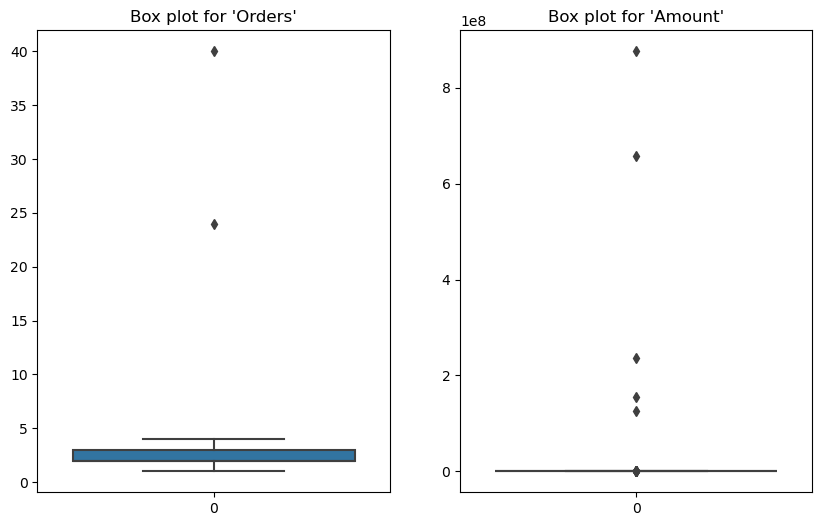

In [31]:
# Visulaization of outliers
fig,ax = plt.subplots(1,2, figsize = (10,6))
sns.boxplot(data = df['Orders'], ax = ax[0])
ax[0].set_title("Box plot for 'Orders'")

sns.boxplot(data = df['Amount'], ax = ax[1])
ax[1].set_title("Box plot for 'Amount'")

### Order

In [32]:
# Quartile
Q1_order = np.quantile(df['Orders'], 0.25)
Q3_order = np.quantile(df['Orders'], 0.75)
IQR_order = Q3_order - Q1_order
#IQR_order
lower_limit_order = Q1_order - 1.5*IQR_order
upper_limit_order = Q3_order + 1.5*IQR_order

In [33]:
# Removing the outliers
df = df[(df['Orders'] > lower_limit_order) & (df['Orders'] < upper_limit_order)]

### Amount

In [34]:
# Quartile
Q1_amount = np.quantile(df['Amount'], 0.25)
Q3_amount = np.quantile(df['Amount'], 0.75)
IQR_amount = Q3_amount - Q1_amount
#IQR_order
lower_limit_amount = Q1_amount - 1.5*IQR_amount
upper_limit_amount = Q3_amount + 1.5*IQR_amount

print(lower_limit_amount)
print(upper_limit_amount)

-5436.625
23580.375


In [35]:
# Removing the outliers
df = df[(df['Amount'] > lower_limit_amount) & (df['Amount'] < upper_limit_amount)]

In [36]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


In [38]:
# Saving the cleaned data
df.to_csv(r"C:\Users\anipi\Desktop\Summer Internship\Diwali Sales Data (2).csv")

### Explorartory Data Analysis 

### Statistical Analysis

In [39]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married


In [40]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


### Data Visualization

#### Gender Wise Analysis

In [41]:
#Plot data
data_gender_count = df.groupby(['Gender'], as_index = False)['Orders'].count()
print("Gender wise order count \n", data_gender_count)

data_gender_amount = df.groupby(['Gender'], as_index = False)['Amount'].sum()
print("Gender wise Purchase Power \n", data_gender_amount)

Gender wise order count 
   Gender  Orders
0      F    7835
1      M    3399
Gender wise Purchase Power 
   Gender       Amount
0      F  74422989.94
1      M  31769368.00


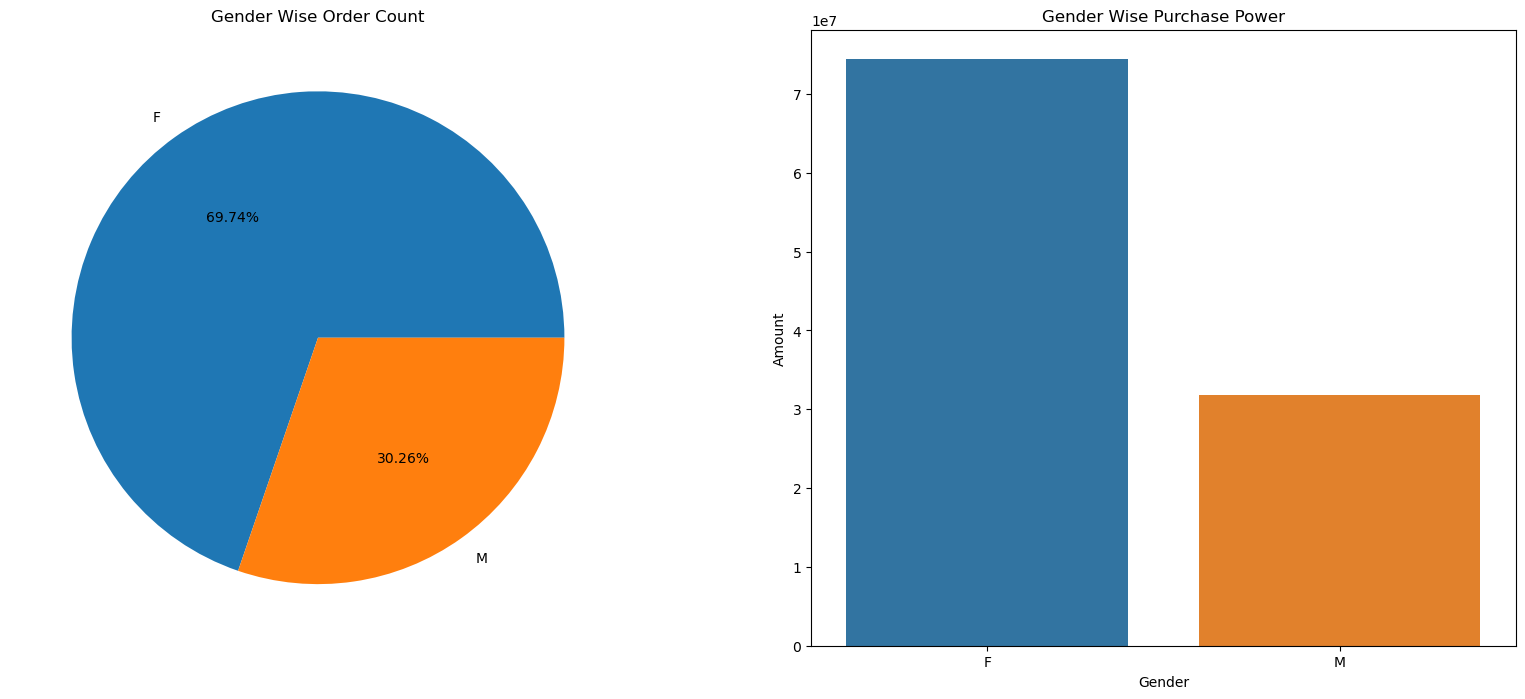

In [42]:
# Plotting
fig,ax = plt.subplots(1,2, figsize = (20,8))

# Pie Chart
ax[0].pie(x = data_gender_count['Orders'], 
           labels = data_gender_count['Gender'], autopct = "%1.2f%%")
ax[0].set_title("Gender Wise Order Count")

# Bar Chart
sns.barplot(x = 'Gender', y = 'Amount', data = data_gender_amount, ax = ax[1])
ax[1].set_title("Gender Wise Purchase Power")
plt.show()

### Conclusion

#### Females generally places more orders and their purchase power is also higher

### Marital Status Wise Analysis

In [43]:
# Plot data
data_marraige_status_amount = df.groupby(['marraige_status'], as_index = False)['Amount'].sum()
data_marraige_status_amount

,marraige_status,Amount
0,Married,44003938.00
1,Unmarried,62188419.94


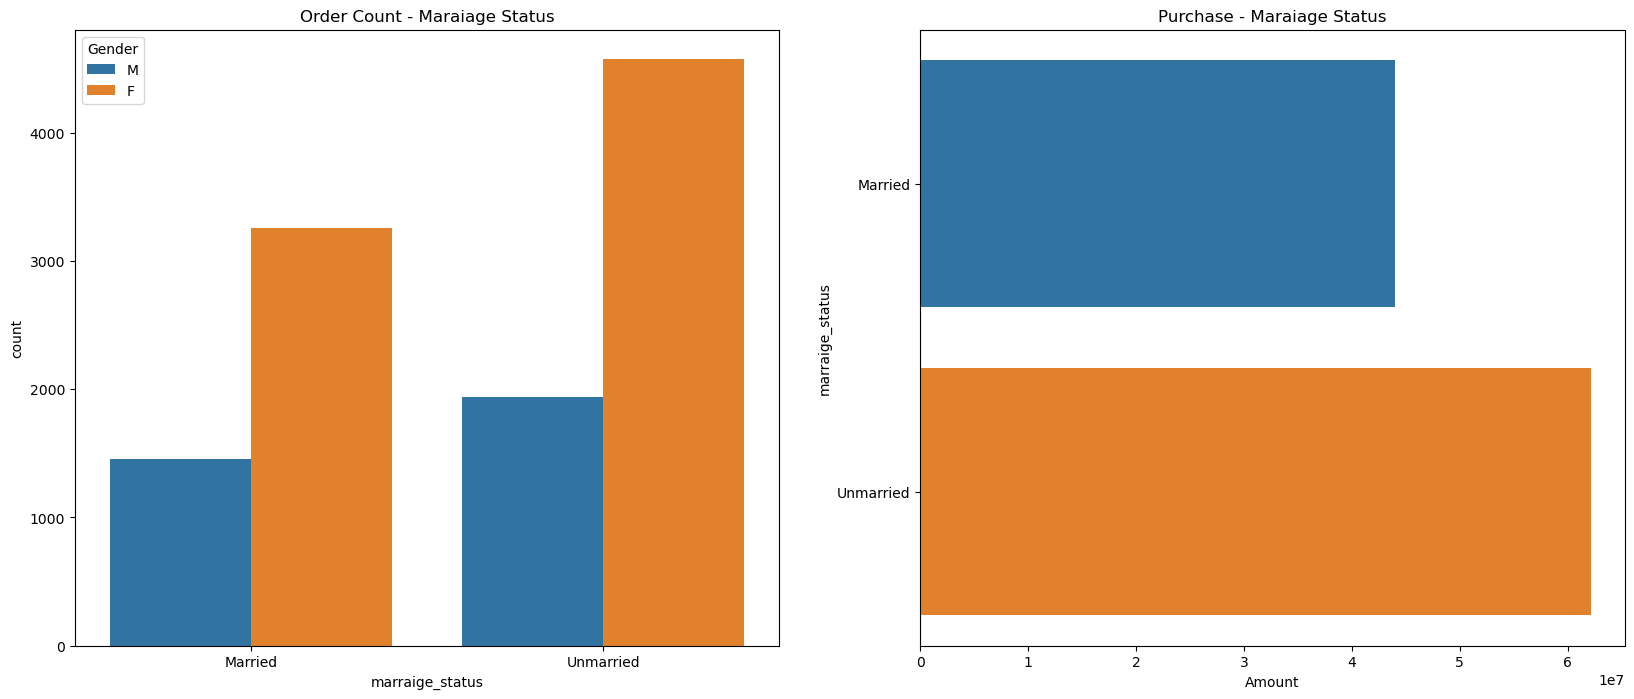

In [44]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,8))

# Countplot
sns.countplot( x = 'marraige_status', hue = 'Gender', data = df, ax = ax[0])
ax[0].set_title('Order Count - Maraiage Status')

# Barplot for purchase power
sns.barplot(y = 'marraige_status', x = 'Amount', orient = 'h',
            data = data_marraige_status_amount, ax = ax[1])
ax[1].set_title('Purchase - Maraiage Status')

plt.show()

### Conclusion

#### Unmarried female place smore order, than married females and then unmarried male

In [45]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married


### Age Wise Analysis

In [46]:
# Plot data
data_age_group_amount = df.groupby(['Age Group'], as_index = False)['Amount'].sum()
data_age_group_amount

,Age Group,Amount
0,0-17,2696529.00
1,18-25,17032196.00
2,26-35,42603794.95
3,36-45,22234332.99
4,46-50,9245595.00
5,51-55,8278320.00
6,55+,4101590.00


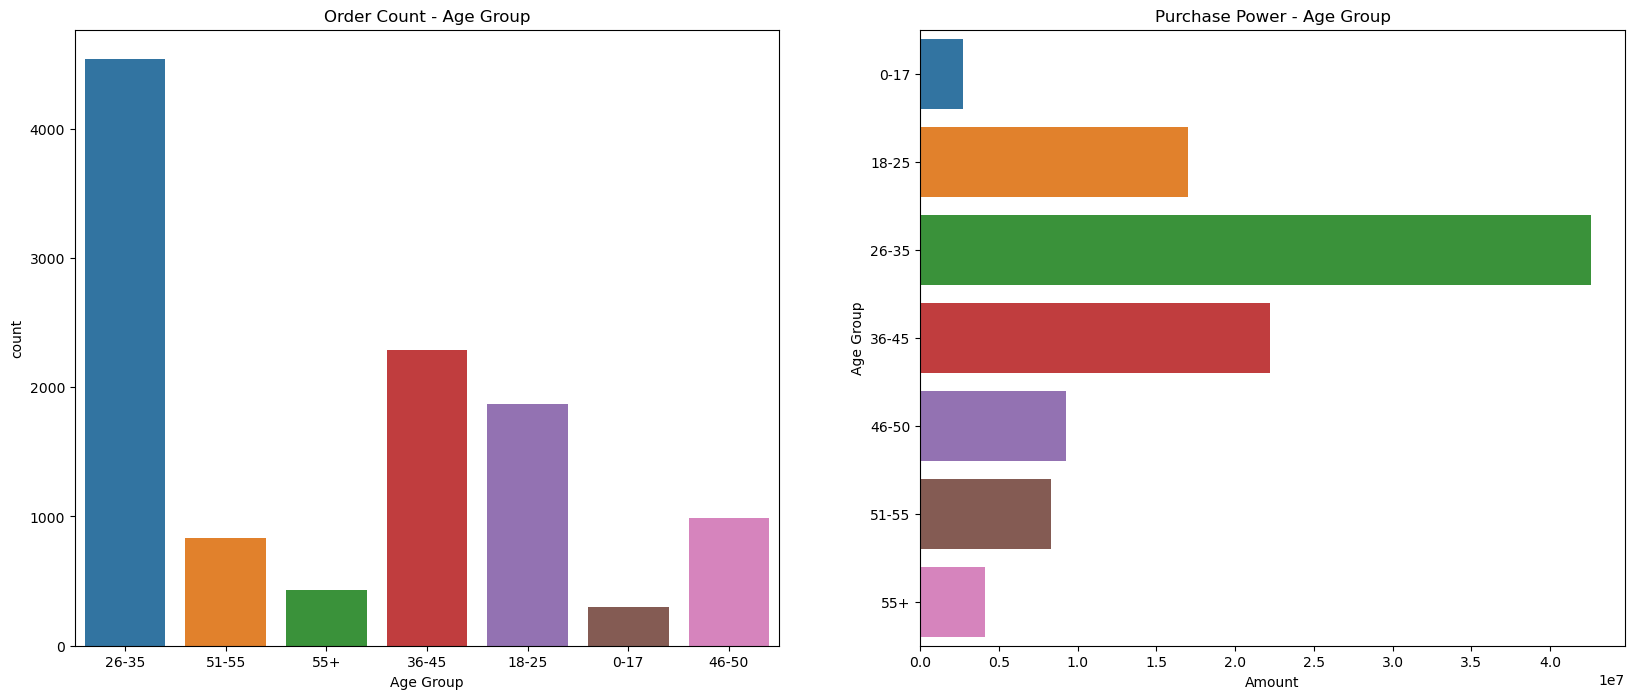

In [47]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,8))

# Countplot
sns.countplot( x = 'Age Group', data = df, ax = ax[0])
ax[0].set_title('Order Count - Age Group')

# Barplot for purchase power
sns.barplot(y = 'Age Group', x = 'Amount', orient = 'h',
            data = data_age_group_amount, ax = ax[1])
ax[1].set_title('Purchase Power - Age Group')

plt.show()

### Conclusion

#### 26-35 Age Group people place more order

### Product_Category

In [48]:
# Plot data
data_product_category = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
data_product_category


,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16484472.00
7,Footwear & Shoes,16009057.45
5,Electronics & Gadgets,15607657.00
8,Furniture,5481325.99


<Axes: xlabel='Product_Category', ylabel='Orders'>

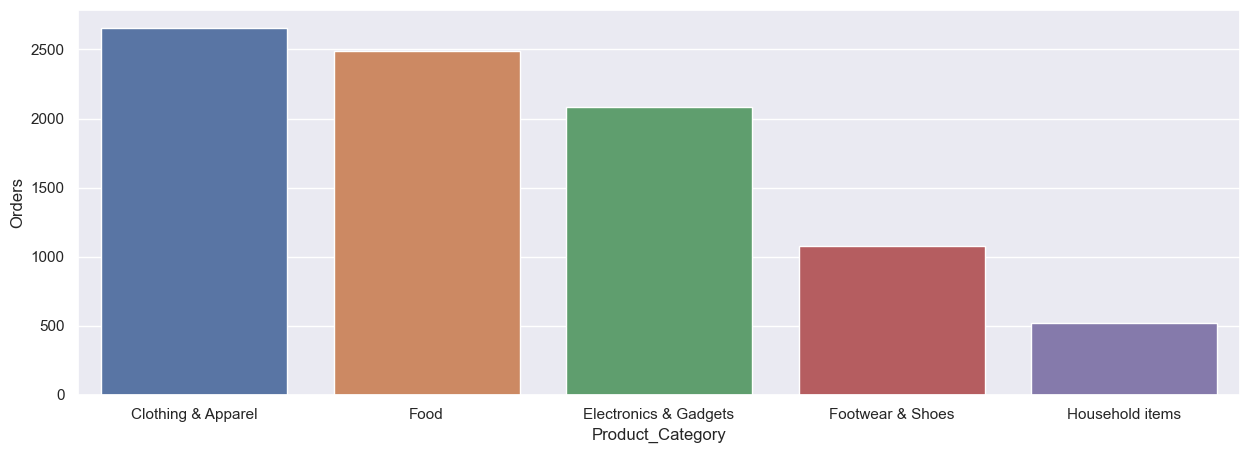

In [109]:
sales_product_category = df.groupby(['Product_Category'],as_index=False)['Orders'].count().sort_values(by='Orders', ascending=False).head(5)

sns.barplot(data = sales_product_category, x='Product_Category',y='Orders')

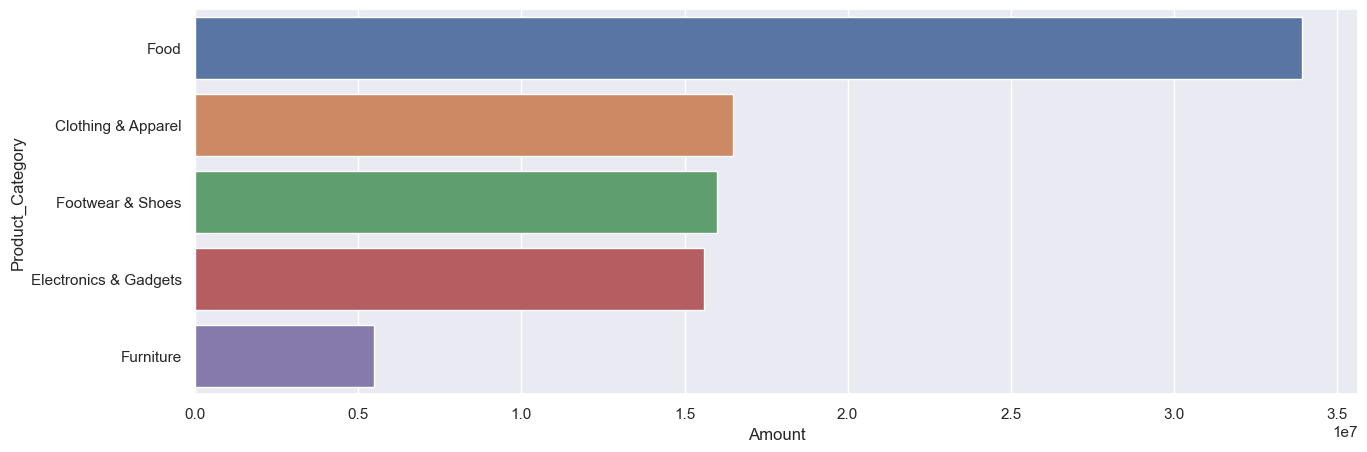

In [112]:

#plot
sns.barplot(data = data_product_category , x='Amount', y='Product_Category')

# Barplot for purchase power

sns.barplot(y = 'Product_Category', x = 'Amount', orient = 'h', 
            data = data_product_category, ax = ax[1])
ax[1].set_title('Purchase - Product_Category')

plt.show()

### Conclusion

#### People are spending more money on food

#### State

In [52]:
# Plot data
data_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
data_state

,State,Amount
14,Uttar Pradesh,19360148.00
10,Maharashtra,14400762.00
7,Karnataka,13705829.00
2,Delhi,11554343.95
9,Madhya Pradesh,8100944.00


<Axes: xlabel='State', ylabel='Orders'>

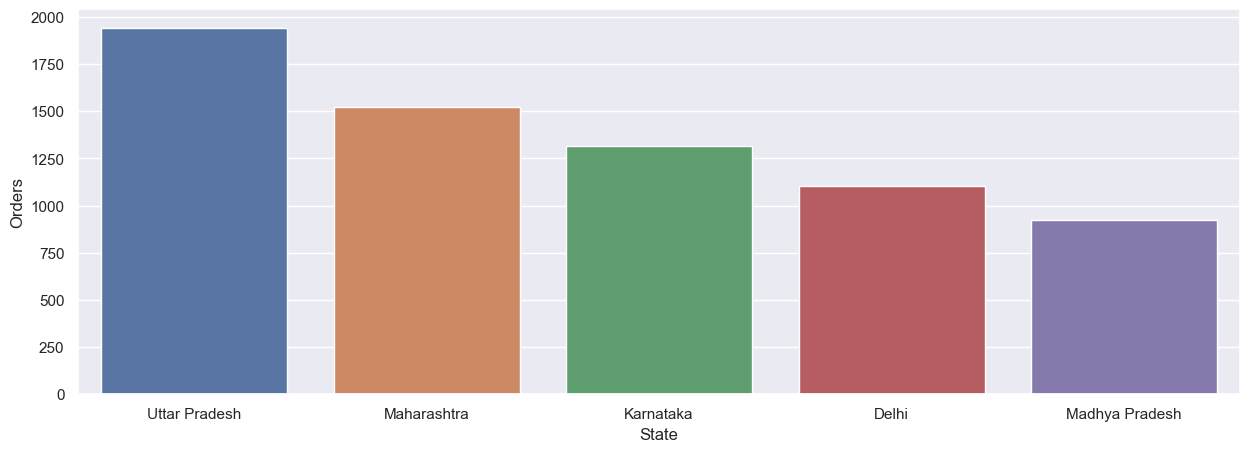

In [98]:
sales_state = df.groupby(['State'],as_index=False)['Orders'].count().sort_values(by='Orders', ascending=False).head(5)

sns.barplot(data = sales_state, x='State',y='Orders')

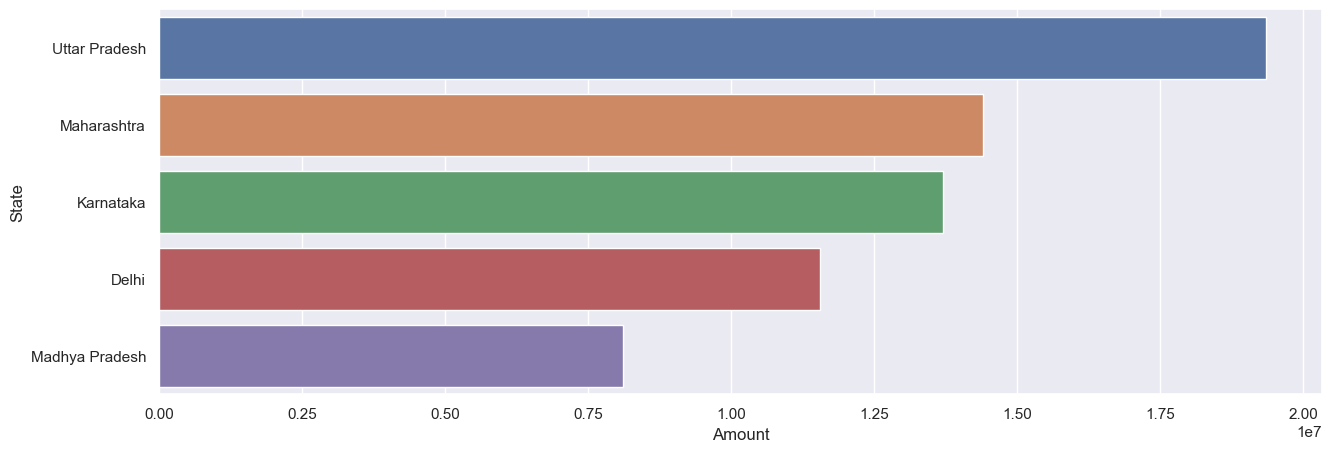

In [67]:
#plot
sns.barplot(data = data_state , x="Amount" , y="State")



# Barplot for purchase power


sns.barplot(y = 'State', x = 'Amount', orient = 'h', 
            data = data_state, ax = ax[1])
ax[1].set_title('Purchase - Top 5 States')

plt.show()

### Conclusion

#### Uttarpradesh state is spending more Amount

In [118]:
#Plot data
data_occupation = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
data_occupation

,Occupation,Amount
10,IT Sector,14902488.00
8,Healthcare,12989061.49
2,Aviation,12596751.00
3,Banking,10767299.45
7,Govt,8425182.00


<Axes: xlabel='Occupation', ylabel='Orders'>

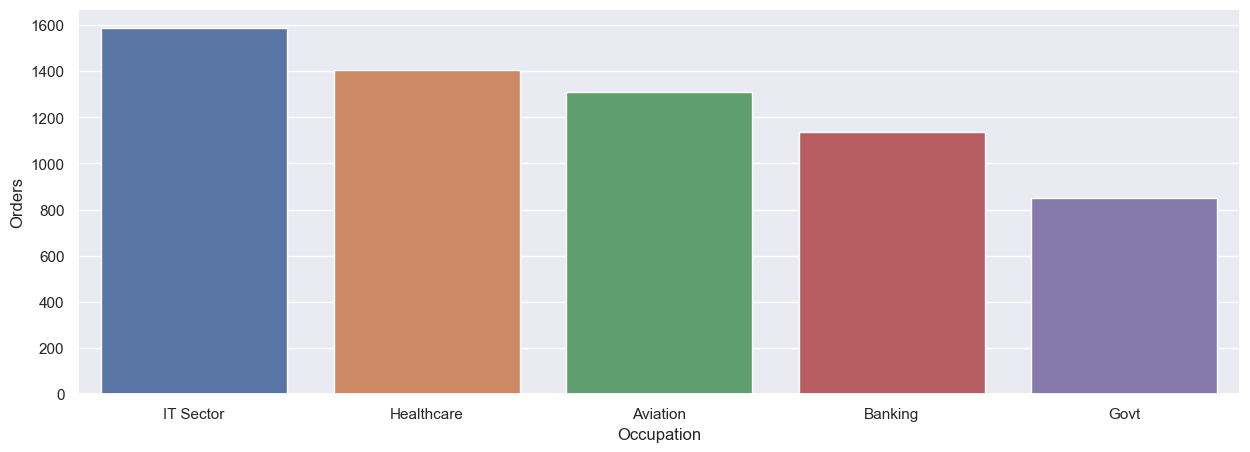

In [124]:
sales_state = df.groupby(['Occupation'],as_index=False)['Orders'].count().sort_values(by='Orders', ascending=False).head(5)

sns.barplot(data = sales_state, x='Occupation',y='Orders')

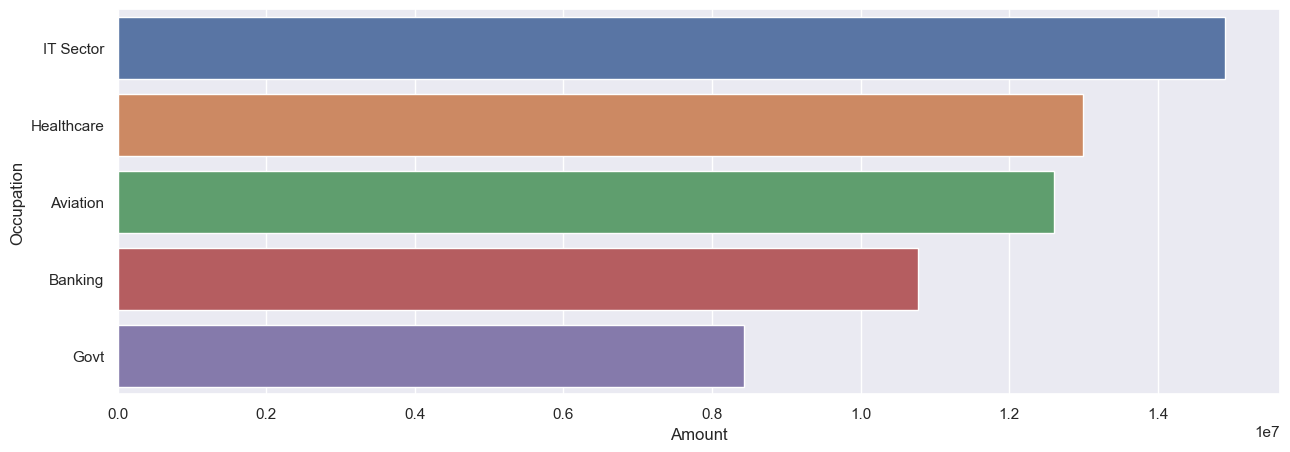

In [126]:
#plots
sns.barplot(data = data_occupation , x = "Amount" , y = "Occupation")
 # Barplot for purchase power

sns.barplot(y = 'Occupation', x = 'Amount', orient = 'h', 
            data = data_occupation, ax = ax[1])
ax[1].set_title('Purchase - Occupation')
plt.show()

### Conclusion

#### People from IT Sector are purchasing morre products

#### Product_ID

In [127]:
data_product_id = df.groupby(['Product_ID'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
data_product_id

,Product_ID,Amount
1678,P00265242,561461.0
1146,P00184942,401816.0
644,P00110942,400899.0
396,P00059442,359230.0
654,P00112142,341020.0


<Axes: xlabel='Product_ID', ylabel='Orders'>

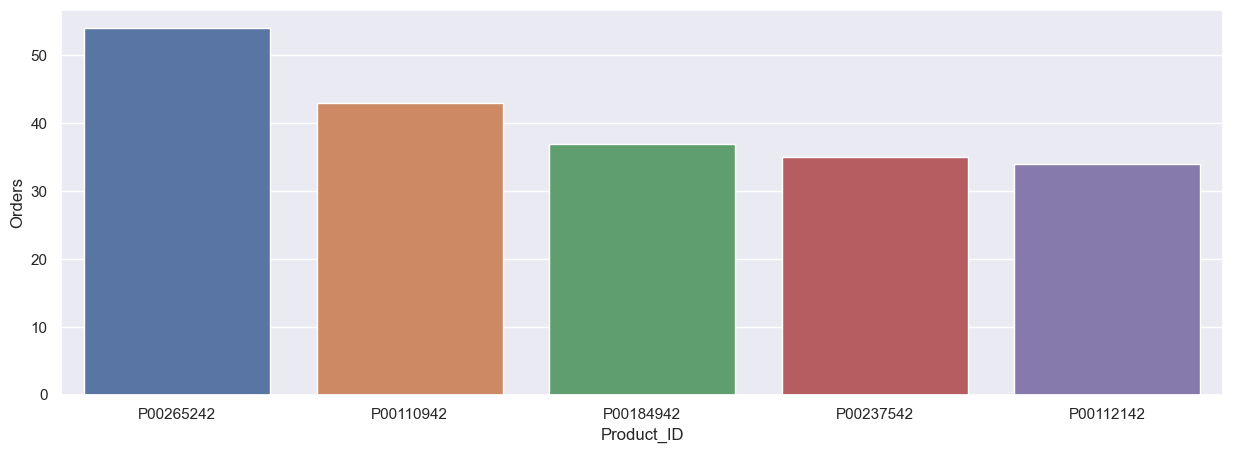

In [129]:
sales_product_id = df.groupby(['Product_ID'],as_index=False)['Orders'].count().sort_values(by='Orders', ascending=False).head(5)

sns.barplot(data = sales_product_id, x='Product_ID',y='Orders')

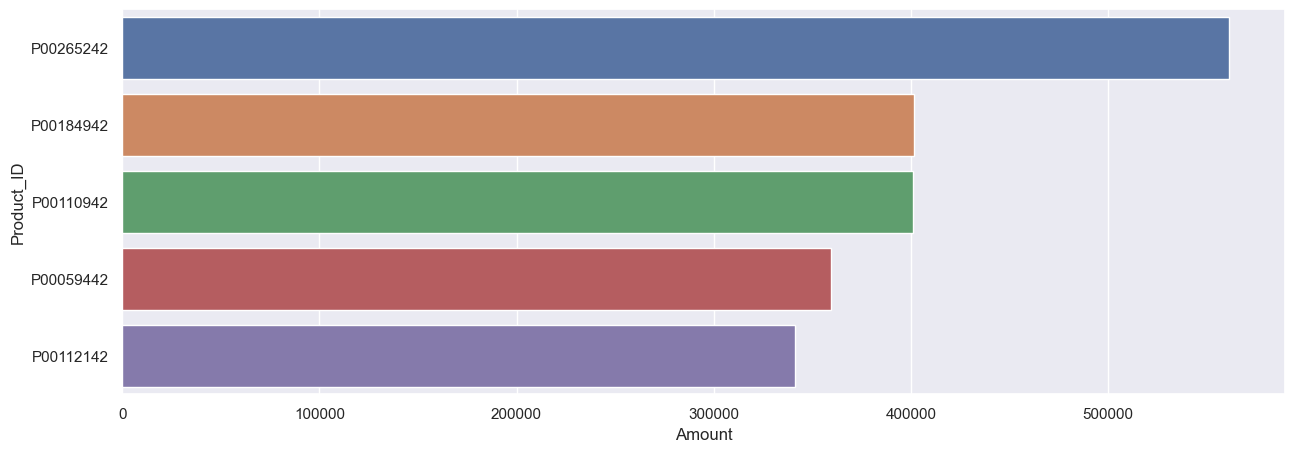

In [132]:
#plots
sns.barplot(data = data_product_id , x = "Amount" , y = "Product_ID")
 # Barplot for purchase power

sns.barplot(y = 'Product_ID', x = 'Amount', orient = 'h', 
            data = data_product_id, ax = ax[1])
ax[1].set_title('Purchase - Product_ID')
plt.show()

### Overall Conclusion

#### UnMarried Females from AgeGroup 26-35 from states UttarPradesh,Maharashtra,Karnataka Working in IT-Sector,HealthCare and Aviation spending more on Food,Clothing-Apperal and Footware and shoes